<a href="https://www.kaggle.com/code/vafaknm/randomforest-knneighbors-xgb-regressions?scriptVersionId=93423153" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Exploration

In [2]:
train_df = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
train_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [3]:
test_df = pd.read_csv('../input/petfinder-pawpularity-score/test.csv')
test_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0
5,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0
6,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1
7,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1


In [4]:
scr_df = pd.read_csv('../input/petfinder-pawpularity-score/sample_submission.csv')
scr_df

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,67.75
1,43a2262d7738e3d420d453815151079e,59.15
2,4e429cead1848a298432a0acad014c9d,20.02
3,80bc3ccafcc51b66303c2c263aa38486,94.53
4,8f49844c382931444e68dffbe20228f4,89.82
5,b03f7041962238a7c9d6537e22f9b017,65.50
6,c978013571258ed6d4637f6e8cc9d6a3,71.42
7,e0de453c1bffc20c22b072b34b54e50f,5.85


**The size of test data is too low! So we can merge train and test datas first and split them to train and test set later**

In [5]:
test_df = test_df.merge(scr_df, how='outer', on = 'Id')
test_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1,67.75
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0,59.15
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1,20.02
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0,94.53
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0,89.82
5,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0,65.50
6,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1,71.42
7,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1,5.85


In [6]:
df = pd.concat([train_df, test_df], ignore_index=True)
df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63.00
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42.00
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28.00
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15.00
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0,94.53
9916,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0,89.82
9917,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0,65.50
9918,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1,71.42


**Let to get some information about data such as type of attribute types and check miss values**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9920 non-null   object 
 1   Subject Focus  9920 non-null   int64  
 2   Eyes           9920 non-null   int64  
 3   Face           9920 non-null   int64  
 4   Near           9920 non-null   int64  
 5   Action         9920 non-null   int64  
 6   Accessory      9920 non-null   int64  
 7   Group          9920 non-null   int64  
 8   Collage        9920 non-null   int64  
 9   Human          9920 non-null   int64  
 10  Occlusion      9920 non-null   int64  
 11  Info           9920 non-null   int64  
 12  Blur           9920 non-null   int64  
 13  Pawpularity    9920 non-null   float64
dtypes: float64(1), int64(12), object(1)
memory usage: 1.1+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject Focus,9920.0,0.028125,0.165338,0.0,0.0,0.0,0.0,1.0
Eyes,9920.0,0.772177,0.419449,0.0,1.0,1.0,1.0,1.0
Face,9920.0,0.903730,0.294976,0.0,1.0,1.0,1.0,1.0
Near,9920.0,0.861089,0.345871,0.0,1.0,1.0,1.0,1.0
Action,9920.0,0.010282,0.100884,0.0,0.0,0.0,0.0,1.0
Accessory,9920.0,0.068246,0.252180,0.0,0.0,0.0,0.0,1.0
Group,9920.0,0.129637,0.335921,0.0,0.0,0.0,0.0,1.0
Collage,9920.0,0.050101,0.218164,0.0,0.0,0.0,0.0,1.0
Human,9920.0,0.166331,0.372396,0.0,0.0,0.0,0.0,1.0
Occlusion,9920.0,0.172278,0.377641,0.0,0.0,0.0,0.0,1.0


# Data Visualization

In [9]:
import plotly 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

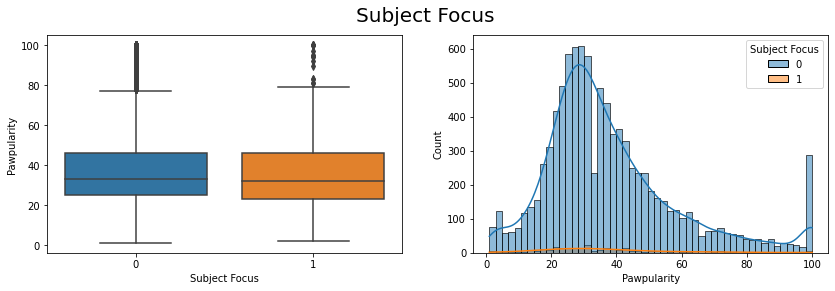

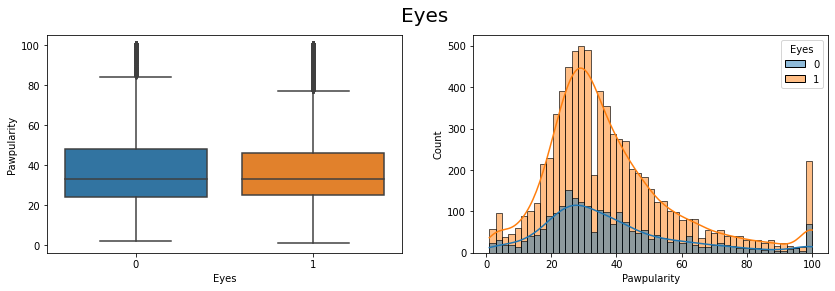

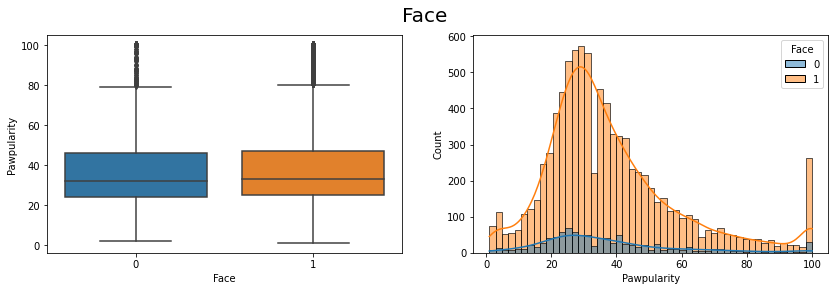

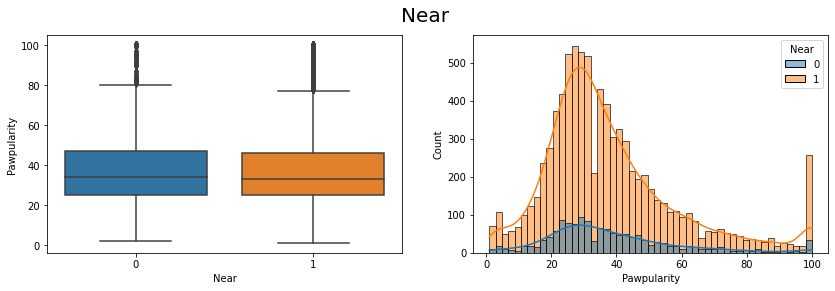

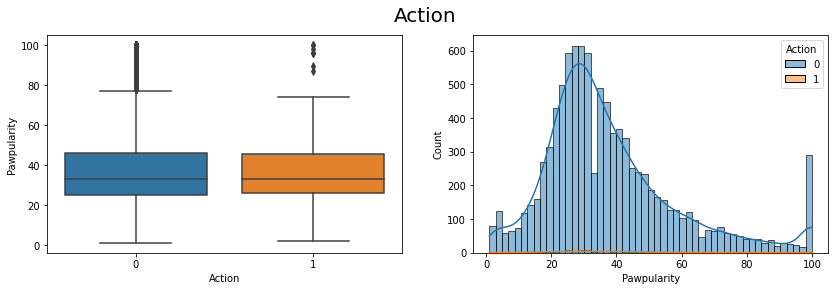

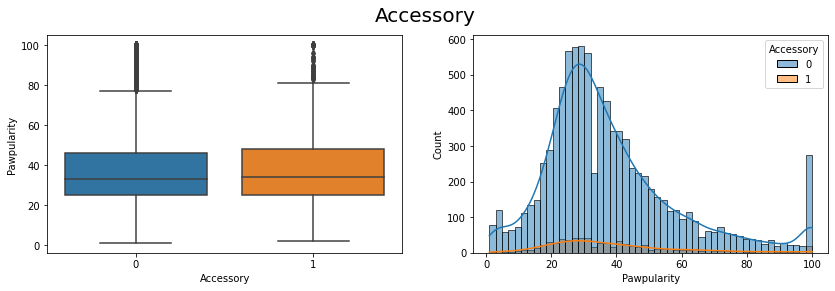

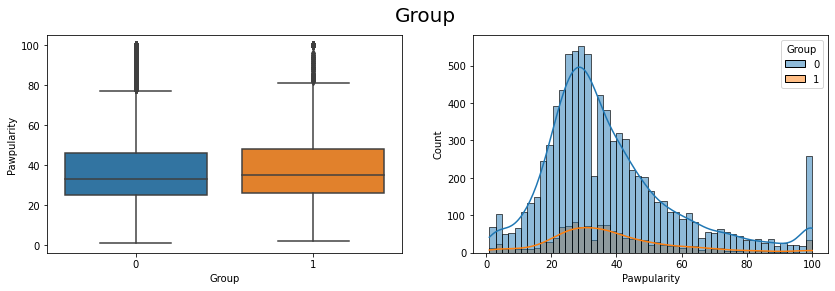

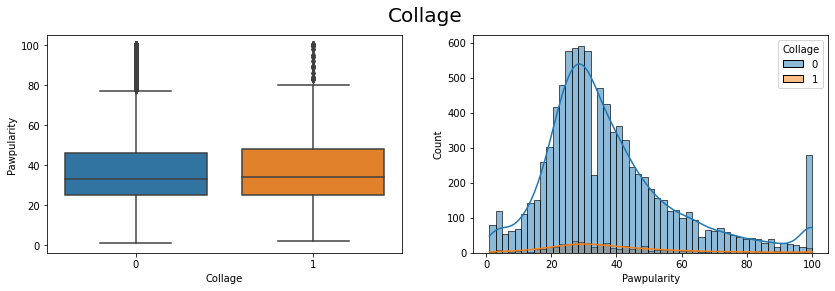

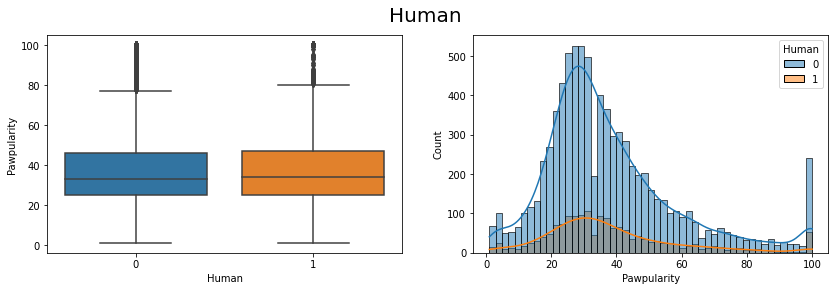

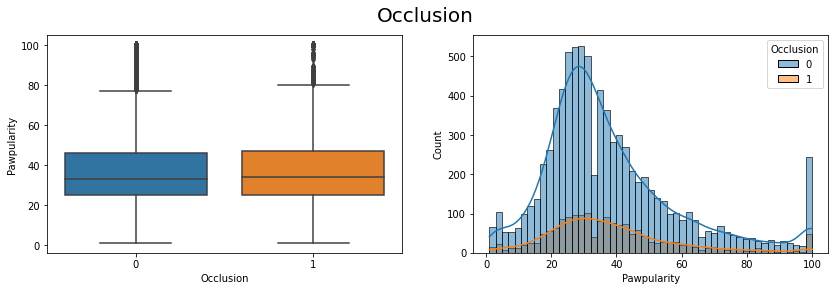

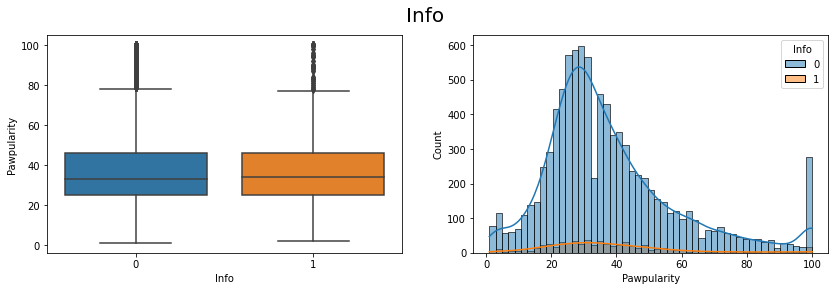

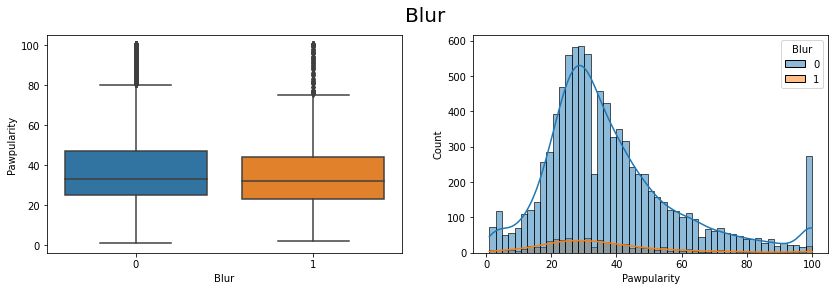

In [10]:
col_var = df.columns[1:-1].values.tolist()

for i in col_var:
    fig, ax = plt.subplots(1,2, figsize=(14,4))
    sns.boxplot(data=df, x=i, y='Pawpularity', ax=ax[0])
    sns.histplot(data=df, x='Pawpularity', hue=i, kde=True, ax=ax[1])
    plt.suptitle(i, fontsize=20)
    fig.show()

**As you see, there isn't any significant relationship between target(Pawplularity) and data attributes! Almost all zeros and ones are in the same variation range!**

**For this reason, it can be assumed that the data used is not suitable for trainin and it's better to use the images themselves.**

# Data Training

**Preprocessing:**

* boxcox normalization for Pawpularity only because other attributes are binary!

<AxesSubplot:>

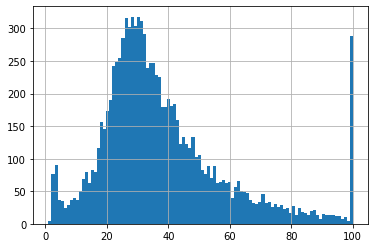

In [11]:
df['Pawpularity'].hist(bins=100)

<AxesSubplot:>

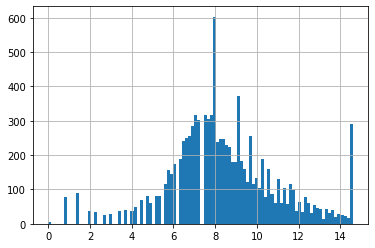

In [12]:
from scipy import stats

df['Pawpularity'], _ = stats.boxcox(df['Pawpularity'])
df['Pawpularity'].hist(bins=100)

In [13]:
X = df[df.columns[1:-1]]
y = df['Pawpularity']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**1. Random Forest Regression**

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
rfr_param = { 'criterion': ['mse'],
              'max_features': ['sqrt', 'auto', 'log2'],
              'max_depth': [4, 5, 6],
              #'warm_start': [True],
              'bootstrap': [True],
              #'oob_score': [True],
              #'min_samples_split': [5, 10, 20, 30],
              'min_samples_leaf': [10, 20, 30],
              'max_samples': [0.75],
              'n_estimators': [50, 100, 150, 200],
              'random_state': [42]}

rfr_grd = GridSearchCV(rfr,
                       rfr_param,
                       cv = 5,
                       n_jobs= -1,
                       verbose=1)

rfr_grd.fit(X, y)
print(rfr_grd.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.3min finished


{'bootstrap': True, 'criterion': 'mse', 'max_depth': 5, 'max_features': 'sqrt', 'max_samples': 0.75, 'min_samples_leaf': 10, 'n_estimators': 150, 'random_state': 42}


In [16]:
rfr = RandomForestRegressor(bootstrap= True, criterion= 'mse', max_depth= 5, max_features= 'sqrt', max_samples= 0.75, min_samples_leaf= 10, n_estimators= 150, random_state= 42)

rfr.fit(X_train, y_train)
#print(rfr.oob_score_)
print(rfr.score(X_test, y_test))  #R**2 of validation loss

0.0010998003114539578


**As we guessed, RandomForestRegressor model was not well trained because of data used**

**2. K-Neighbors Regressorion**

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knr = KNeighborsRegressor()
knr_param = {'algorithm': ['ball_tree', 'kd_tree', 'brute'],
             'leaf_size': [2, 5, 10, 20, 30],
             'metric': ['minkowski', 'euclidean'],
             'p': [2, 3],
             'n_neighbors': [20, 40, 80, 100]}

knr_grd = GridSearchCV( knr,
                        knr_param,
                        cv = 5,
                        n_jobs= -1,
                        verbose=1)

knr_grd.fit(X_train, y_train)
print(knr_grd.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.0min


{'algorithm': 'kd_tree', 'leaf_size': 2, 'metric': 'minkowski', 'n_neighbors': 100, 'p': 2}


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 13.2min finished


In [18]:
knr = KNeighborsRegressor(algorithm= 'kd_tree', leaf_size= 2, metric= 'minkowski', n_neighbors= 100, p=2)

knr.fit(X_train, y_train)
print(knr.score(X_test, y_test))

-0.0070032439554919


**OMG! it just get worse :)**

**3. XGBRegressor**

In [19]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgbr = xgb.XGBRegressor()
xgbr_param1 = {'booster': ['gbtree'],
              'tree_method': ['gpu_hist'],
              'predictor': ['gpu_predictor'],
              'objective': ['reg:squarederror'],
              'eval_metric': ['rmse'],
              'learning_rate': [0.01, 0.05, 0.1, 0.5],
              'gamma': [0, 0.25, 0.5, 1],
              'max_depth': [4, 5, 6, 7],
              'subsample': [0.75],
              'n_estimators': [50, 100, 200],
              'random_state': [42]}

xgbr_grd1 = GridSearchCV(xgbr,
                        xgbr_param1,
                        cv = 5,
                        n_jobs= -1,
                        verbose=1)

xgbr_grd1.fit(X_train, y_train)
print(xgbr_grd1.best_params_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  5.7min finished


{'booster': 'gbtree', 'eval_metric': 'rmse', 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'objective': 'reg:squarederror', 'predictor': 'gpu_predictor', 'random_state': 42, 'subsample': 0.75, 'tree_method': 'gpu_hist'}


In [20]:
xgbr1 = xgb.XGBRegressor(booster= 'gbtree', tree_method= 'gpu_hist', predictor= 'gpu_predictor', objective= 'reg:squarederror', eval_metric= 'rmse', learning_rate= 0.05, gamma= 1, max_depth= 4, subsample= 0.8, n_estimators= 100, random_state= 42)

xgbr1.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse')
xgbr1.score(X_test, y_test) #R**2

[0]	validation_0-rmse:7.94039
[1]	validation_0-rmse:7.58528
[2]	validation_0-rmse:7.24926
[3]	validation_0-rmse:6.93163
[4]	validation_0-rmse:6.63452
[5]	validation_0-rmse:6.35433
[6]	validation_0-rmse:6.09035
[7]	validation_0-rmse:5.84014
[8]	validation_0-rmse:5.60553
[9]	validation_0-rmse:5.38506
[10]	validation_0-rmse:5.17705
[11]	validation_0-rmse:4.98351
[12]	validation_0-rmse:4.80179
[13]	validation_0-rmse:4.63211
[14]	validation_0-rmse:4.47366
[15]	validation_0-rmse:4.32643
[16]	validation_0-rmse:4.18858
[17]	validation_0-rmse:4.05993
[18]	validation_0-rmse:3.93982
[19]	validation_0-rmse:3.82835
[20]	validation_0-rmse:3.72591
[21]	validation_0-rmse:3.63023
[22]	validation_0-rmse:3.54160
[23]	validation_0-rmse:3.46066
[24]	validation_0-rmse:3.38541
[25]	validation_0-rmse:3.31722
[26]	validation_0-rmse:3.25341
[27]	validation_0-rmse:3.19493
[28]	validation_0-rmse:3.14127
[29]	validation_0-rmse:3.09192
[30]	validation_0-rmse:3.04672
[31]	validation_0-rmse:3.00452
[32]	validation_0-

-0.0009477663909194245

# Result

**As we have guessed from the diagrams, the csv files are not suitable for training and we should use images themselves**